In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Charger les données depuis le fichier CSV (assurez-vous d'ajuster le chemin)
data = pd.read_csv(r'C:\Users\anask\Desktop\AnalyzeDatascrapping\data.csv')

In [3]:
# Afficher les premières lignes du dataframe pour comprendre la structure des données
print(data.head())

                       Nom De L'application  Prix              Catégorie  \
0                       Win IPTV Player Pro  4.89                Loisirs   
1                        Search Everything.  0.99                Loisirs   
2                    Lecteur de fichier SWF  4.89  Utilitaires et outils   
3                  X RemotePlay - Streaming  9.89                 Social   
4  Earth Maps Premium - Maps and Navigation  1.99   Navigation et cartes   

    Developpeur         Date De Sortie  \
0       Abigail   9/12/2023 5:45:10 AM   
1       Blossom   8/31/2023 7:26:06 AM   
2  Weila Studio  4/12/2023 11:08:26 PM   
3       Abigail   9/20/2023 3:26:38 AM   
4  MegaAppsLabs   5/14/2022 1:21:37 AM   

                                         Description  
0  IPTV app is the perfect solution to play IPTV,...  
1  Il s'agit d'une application de recherche facil...  
2  Le lecteur SWF vous permet d'afficher le conte...  
3  This application allows you to stream your Pla...  
4  Earth Maps p

In [4]:
# Configuration du style de seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

C:\Users\anask\AppData\Local\Temp\ipykernel_18424\1950414241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Catégorie', data=data, palette='viridis')


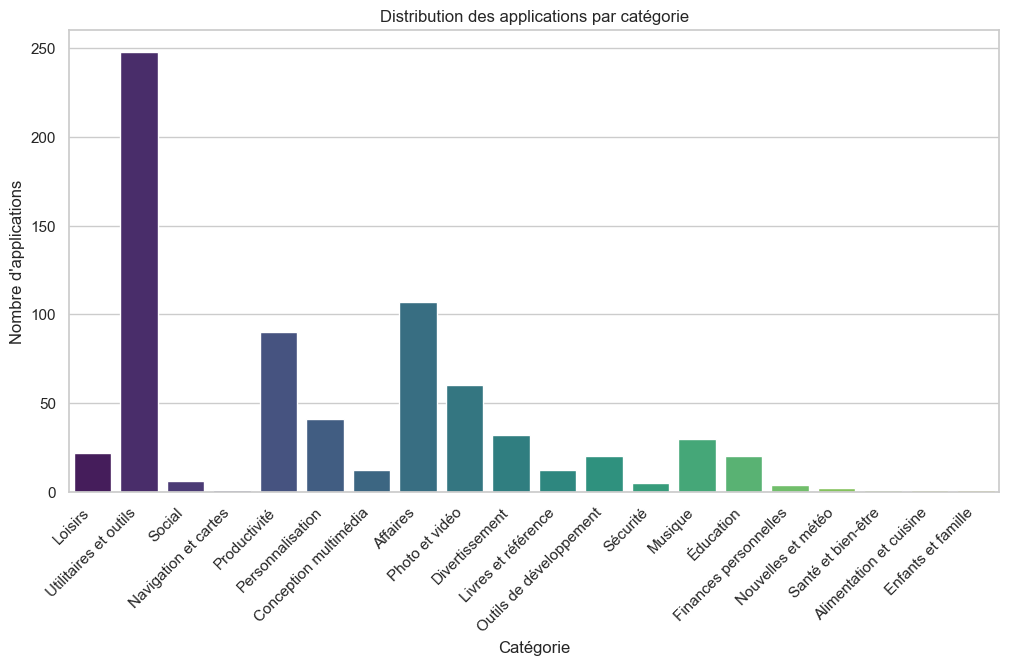

In [5]:
# 1. Distribution des applications par catégorie avec un graphique à barres
plt.figure(figsize=(12, 6))
sns.countplot(x='Catégorie', data=data, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des applications par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'applications')
plt.show()

C:\Users\anask\AppData\Local\Temp\ipykernel_18424\2981621605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Catégorie', y='Prix', data=data, palette='coolwarm')


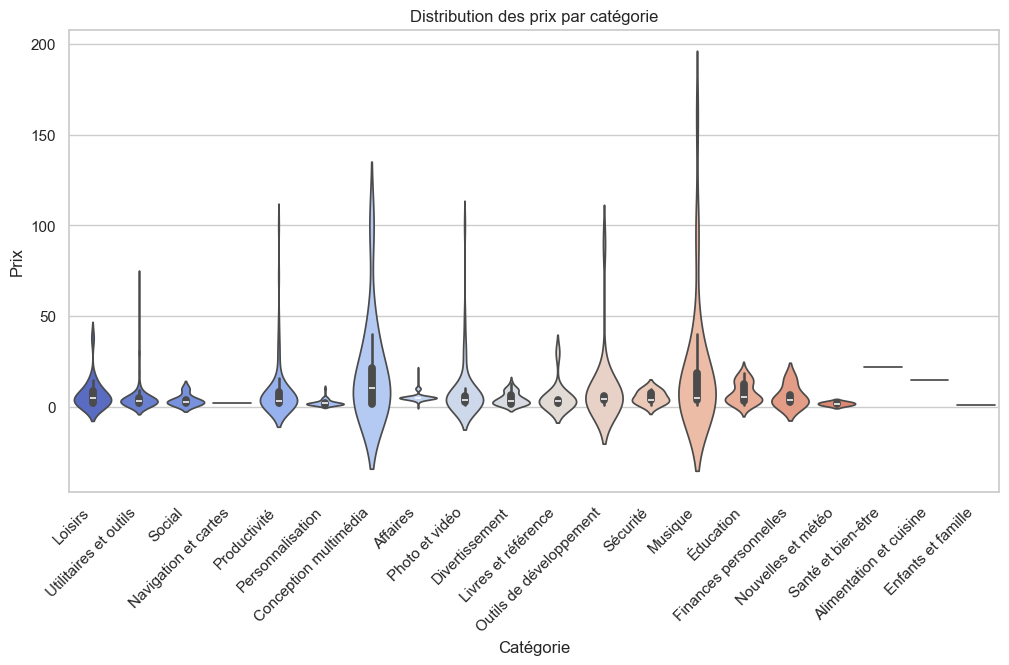

In [8]:
# 2. Distribution des prix par catégorie avec un violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Catégorie', y='Prix', data=data, palette='coolwarm')
plt.title('Distribution des prix par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\anask\AppData\Local\Temp\ipykernel_18424\2878212542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='BuGn')


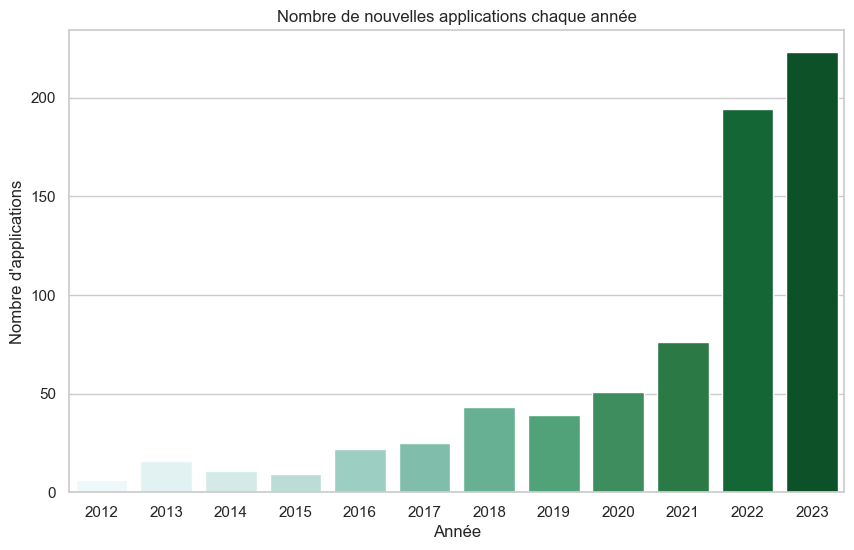

In [12]:
# 3. Nombre de nouvelles applications chaque année avec un count plot
data['Year'] = pd.to_datetime(data['Date De Sortie']).dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data, palette='BuGn')
plt.title('Nombre de nouvelles applications chaque année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'applications')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anask\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


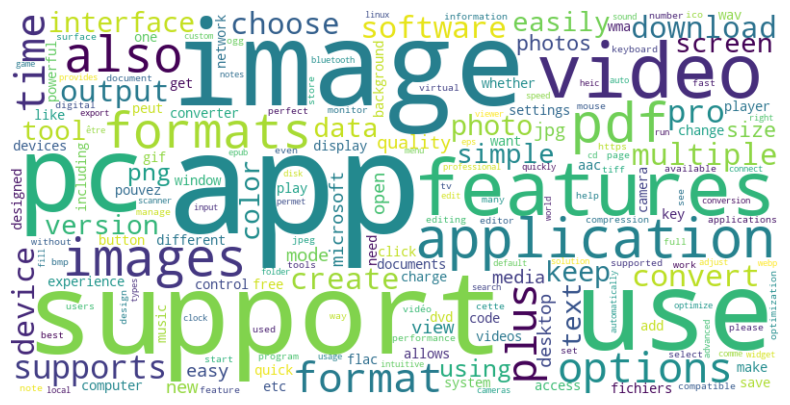

In [17]:
# 4. Nuage de mots pour les descriptions des applications
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords


# Télécharger les stopwords en anglais et en français
nltk.download('stopwords')
stopwords_eng = set(stopwords.words('english'))
stopwords_fr = list(stopwords.words('french'))
stopwords_fr.extend(['files', 'windows', 'audio', 'file'])
stopwords_fr = set(stopwords_fr)

# Concaténer toutes les descriptions en une seule chaîne de caractères
all_descriptions = ' '.join(data['Description'].tolist())

# Supprimer la ponctuation et les stopwords
tokens = nltk.word_tokenize(all_descriptions)
tokens = [word.lower() for word in tokens if word.isalpha()]
tokens = [word for word in tokens if word not in stopwords_eng and word not in stopwords_fr]

# Créer un dictionnaire de fréquence des mots
word_freq = nltk.FreqDist(tokens)

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Enregistrer le nuage de mots dans un fichier image
wordcloud.to_file("wordcloud.png")

# Afficher le nuage de mots
plt.show()